In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (60000, 28, 28)
y_train =  (60000,)
X_test =  (10000, 28, 28)
y_test =  (10000,)


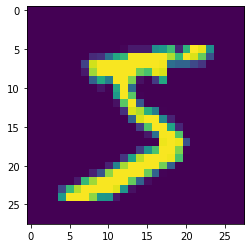

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [25]:
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        # Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        Dense(10, activation='softmax')
    ]
)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2613 - accuracy: 0.9217 - val_loss: 0.1660 - val_accuracy: 0.9519
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1635 - accuracy: 0.9534 - val_loss: 0.1975 - val_accuracy: 0.9531
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1454 - accuracy: 0.9607 - val_loss: 0.1897 - val_accuracy: 0.9540
Epoch 4/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1245 - accuracy: 0.9655 - val_loss: 0.2135 - val_accuracy: 0.9559
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1187 - accuracy: 0.9683 - val_loss: 0.1655 - val_accuracy: 0.9606
Epoch 6/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1150 - accuracy: 0.9709 - val_loss: 0.1875 - val_accuracy: 0.9578
Epoch 7/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1010 - accuracy: 0.9730 - val_loss: 0.2046 -

In [28]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [29]:
y_pred = y_pred.argmax(axis=1)

In [30]:
accuracy_score(y_test, y_pred)

0.9612

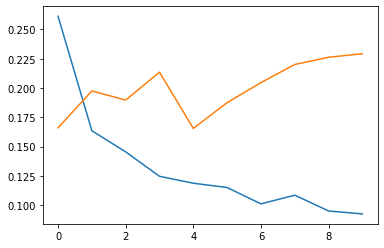

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

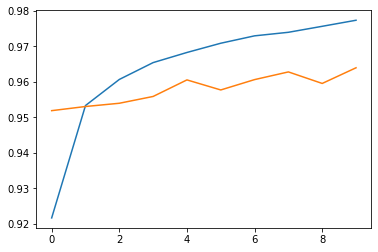

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])